Compare output of skw from dask with rmcs code

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib as mpl
mpl.rcParams["xtick.labelsize"] = "large"
mpl.rcParams["ytick.labelsize"] = "large"

import matplotlib.pyplot as plt
from scipy.signal import stft, spectrogram, detrend

In [24]:
import sys
sys.path.append("/global/homes/r/rkube/repos/delta")
from analysis.channels import channel, channel_range

sys.path.append("/global/homes/r/rkube/repos/fluctana_rmc/")
from kstarecei import KstarEcei


In [25]:
crg = channel_range(channel('L', 12, 3), channel('L', 15, 3))
cl = list(crg)

for c in cl:
    print(c.__str__())

L1203
L1303
L1403
L1503


In [22]:
def test_rmc():
    import sys
    sys.path.append("/global/homes/r/rkube/repos/fluctana_rmc")
    from fluctana import FluctAna, KstarEcei

    shot = 18431
    trange = [-0.10, -0.08]
    clist = [['ECEI_L1203','ECEI_L1303','ECEI_L1403','ECEI_L1503'],
            ['ECEI_L1303','ECEI_L1403','ECEI_L1503','ECEI_L1603']]

    # call fluctana
    A = FluctAna()

    # add data
    A.add_data(KstarEcei(shot=shot, clist=clist[0], data_path='/global/cscratch1/sd/rkube/KSTAR/kstar_streaming/'), trange=trange, norm=1)
    A.add_data(KstarEcei(shot=shot, clist=clist[1], data_path='/global/cscratch1/sd/rkube/KSTAR/kstar_streaming/'), trange=trange, norm=1)

    # do fft; full = 1 
    A.fftbins(nfft=2048, window='hann', overlap=0.5, detrend=0, full=1)

    # calculate correlation using data sets done and dtwo. results are saved in A.Dlist[dtwo].val
    A.skw(done=0, dtwo=1, kstep=0.01)
    # plot the results; dnum = data set number, cnl = channel number list to plot
    #A.mplot(dnum=1,cnl=range(len(A.Dlist[1].clist)),type='val')
    
    return(A)

Rading init: 
Data is normalized by trange average ECEI
LOW signal level channel ECEI_L1203, ref = 100%, siglevel = -0.00025 V
LOW signal level channel ECEI_L1303, ref = 100%, siglevel = -0.0002 V
LOW signal level channel ECEI_L1403, ref = 100%, siglevel = 0 V
LOW signal level channel ECEI_L1503, ref = 100%, siglevel = 0 V
Rading init: 
Data is normalized by trange average ECEI
LOW signal level channel ECEI_L1303, ref = 100%, siglevel = -0.0002 V
LOW signal level channel ECEI_L1403, ref = 100%, siglevel = 0 V
LOW signal level channel ECEI_L1503, ref = 100%, siglevel = 0 V
LOW signal level channel ECEI_L1603, ref = 100%, siglevel = -0.0006 V
***fftbins: win_factor = 0.374817
***fftbins: win_factor = 0.374817
***fftbins: win_factor = 0.374817
***fftbins: win_factor = 0.374817
dnum 0 fftbins 7 with hann size 2048 overlap 0.5 detrend 0 full 1
***fftbins: win_factor = 0.374817
***fftbins: win_factor = 0.374817
***fftbins: win_factor = 0.374817
***fftbins: win_factor = 0.374817
dnum 1 fftbin

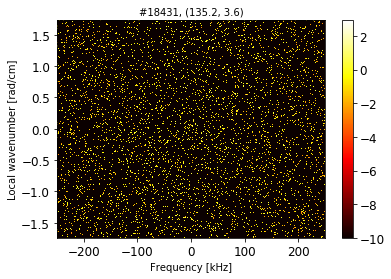

In [30]:
A = test_rmc()

In [32]:
c1 = channel('L', 12, 3)
c2 = channel('L', 13, 3)

print("Channel 1: ", c1, ", idx = ", c1.idx())
print("Channel 2: ", c2, ", idx = ", c2.idx())

with np.load("../test_data/io_array_tr_s0001.npz") as df:
    # Load transformed data, as generated by datareader
    io_array_tr = df["io_array"]
    print("io_array_tr.shape = ", io_array_tr.shape)

with np.load("../test_data/fft_data_s0001.npz") as df:
    # Load FFT data, as calculated by processor.
    fft_data = df["fft_data"]
    print("fft_data.shape = ", fft_data.shape)
    
with np.load("../test_data/skw_task_001.npz") as df:
    # Load results from dask tasks
    skw_task = df["res"]
    
fft_data = np.fft.fftshift(fft_data, axes=1)

print("Channel idx for ", c1, ": {0:d}".format(c1.idx()), " for ", c1, ", {0:d}".format(c2.idx()))

Channel 1:  L1203 , idx =  90
Channel 2:  L1303 , idx =  98
io_array_tr.shape =  (192, 10000)
fft_data.shape =  (192, 2048, 8)
Channel idx for  L1203 : 90  for  L1203 , 98


In [33]:
skw_task.shape

(0,)